# Crear un conjunto de datos complementarios

## Referencias
* https://www.congreso.gob.ar/
* https://www.diputados.gob.ar/congreso_explicado/
* https://www.hcdn.gob.ar/proyectos/
* https://www.congreso.gob.ar/leyes.php 
* https://www2.hcdn.gob.ar/secparl/dgral_info_parlamentaria/dip/index.html
* https://laborlegislativa.com/
* https://datos.hcdn.gob.ar/dataset?groups=leyes


* **Portal de Datos abiertos Diputados**: de: https://datos.hcdn.gob.ar/dataset. 
Visto 14/06/2024. 31 Dataset disponibles.
Visto 18/01/2025. 30 Dataset disponibles.

* **Infoleg**. s.f. Buscador de Información Legislativa y Documental del Ministerio de Justicia y Derechos Humanos de la Nación (Argentina). Recuperado de http://www.infoleg.gob.ar/


## 1.2.1 Recolección de datos 

### Datos abiertos de diputados: leyes sancionadas.
* Documentación 	http://www4.hcdn.gob.ar/Datos_doc/Doc_leyes_sancionadas.pdf
* Responsable 	Secretaria Parlamentaria
* Última actualización 	2 de enero de 2025, 10:58 (UTC-03:00)
* Creado 	11 de julio de 2019, 13:39 (UTC-03:00)
* Frecuencia de actualización 	eventual
  
Trámite parlamentario de los proyectos convertidos en ley.

In [1]:
# Importar librerias

# Manipular datos
import pandas as pd
import numpy as np
import pickle
import os

# EDA
import sweetviz as sv
from ydata_profiling import ProfileReport

# Visualizar
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar path
os.chdir('C://iamas_datos2024/proyectos_parlamentarios_2025/')
pd.set_option('display.max_colwidth', None)

In [3]:
# Leer archivo base
# Última actualización 	2 de enero de 2025, 10:58 (UTC-03:00)
# Creado 	11 de julio de 2019, 13:39 (UTC-03:00)
leyesSanc_df = pd.read_csv('diputados/leyessancionadas1.9.csv') 
print("Tamaño de leyesSanc_df:",leyesSanc_df.shape)
display(leyesSanc_df.head())
print(leyesSanc_df.info())

Tamaño de leyesSanc_df: (1304, 7)


,Proyecto.ID,Cámara.Sancionadora,Sanción.Definitiva,Ley,Expediente.Inicial,Primera.media.sanción,Segunda.media.sanción
0,HCDN278519,Diputados,2024-10-01T00:00:00,27782,0045-S-2024,2024-09-26T00:00:00,NaN
1,HCDN247826,Diputados,2024-10-01T00:00:00,27781,0219-D-2021,2022-06-08T00:00:00,2024-09-12T00:00:00
2,HCDN232786,Diputados,2024-10-01T00:00:00,27780,0005-S-2024,2024-03-14T00:00:00,NaN
3,HCDN235066,Diputados,2024-10-01T00:00:00,27779,0006-S-2024,2024-03-14T00:00:00,NaN
4,HCDN230315,Diputados,2024-10-01T00:00:00,27778,0093-S-2020,2020-10-08T00:00:00,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Proyecto.ID            1304 non-null   object
 1   Cámara.Sancionadora    1304 non-null   object
 2   Sanción.Definitiva     1304 non-null   object
 3   Ley                    1304 non-null   int64 
 4   Expediente.Inicial     1304 non-null   object
 5   Primera.media.sanción  1304 non-null   object
 6   Segunda.media.sanción  82 non-null     object
dtypes: int64(1), object(6)
memory usage: 71.4+ KB
None


In [4]:
# Estadística
leyesSanc_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Proyecto.ID,1304,1301,HCDN158451,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cámara.Sancionadora,1304,2,Diputados,659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sanción.Definitiva,1304,279,2012-11-28T00:00:00,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ley,1304.0,NaN,NaN,NaN,27124.352761,383.707182,26371.0,26799.75,27128.5,27455.25,27782.0
Expediente.Inicial,1304,1301,0112-S-2014,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primera.media.sanción,1304,282,2012-11-28T00:00:00,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segunda.media.sanción,82,58,2012-11-28T00:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# EDA ProfileReport
report = ProfileReport(leyesSanc_df, title='EDA automático')
report.to_file('leyes_sancionadas_report.html')
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Observación**
* El conjunto de datos  tiene duplicados 2 (0.2%) 
* Segunda.media.sanción tiene 1222 (93.7%) valores faltantes
    * si el valor fuere nulo, debe interpretarse que el expediente inicial fue sancionado definitivamente por la Cámara revisora. https://www4.hcdn.gob.ar/Datos_doc/Doc_leyes_sancionadas.pdf

In [8]:
# leyesSanc_df
leyesSanc_df['Sanción.Definitiva'] = pd.to_datetime(leyesSanc_df['Sanción.Definitiva'], errors='coerce')

leyesSanc_df['Sanción.Definitiva'].describe()

count                             1304
mean     2015-10-25 15:32:01.472392704
min                2008-05-21 00:00:00
25%                2012-11-21 00:00:00
50%                2015-03-11 00:00:00
75%                2018-10-10 00:00:00
max                2024-10-01 00:00:00
Name: Sanción.Definitiva, dtype: object

In [9]:
# leyesSanc_df
leyesSanc_df['Primera.media.sanción'] = pd.to_datetime(leyesSanc_df['Primera.media.sanción'], errors='coerce')
leyesSanc_df['Segunda.media.sanción'] = pd.to_datetime(leyesSanc_df['Segunda.media.sanción'], errors='coerce')


In [10]:
# Controlar duplicados
print("Hay duplicados?: ",leyesSanc_df[leyesSanc_df.duplicated(keep=False)].shape)

Hay duplicados?:  (4, 7)


In [11]:
# Eliminar duplicados
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
print("Antes de eliminar duplicados:", leyesSanc_df.shape)
leyesSanc_df.drop_duplicates(keep='last', inplace=True)
print("Después de eliminar duplicados:", leyesSanc_df.shape)

Antes de eliminar duplicados: (1304, 7)
Después de eliminar duplicados: (1302, 7)


In [12]:
# Guarda el archivo binario proyecto
with open('leyesSanc_df_2025.pkl', 'wb') as file:
    pickle.dump(leyesSanc_df,file)

### Datos abiertos de diputados:  Sumario de leyes 
* Documentación 	http://www4.hcdn.gob.ar/Datos_doc/DOCUMENTACION – SUMARIO LEYES.pdf
* Responsable 	Secretaría Parlamentaria
* Versión 	1.0
* Última actualización 	27 de febrero de 2020, 11:32 (UTC-03:00)
* Creado 	11 de julio de 2019, 13:36 (UTC-03:00)
* Frecuencia de actualización 	eventual


Trámite parlamentario de los proyectos convertidos en ley.


In [13]:
sumarioLeyes_df = pd.read_csv('diputados/sumario-leyes1.3.csv')
print('Tamaño de dataset de sumarioLeyes_df:',sumarioLeyes_df.shape)
display(sumarioLeyes_df.head(2))
display(sumarioLeyes_df.describe(include='all').T)

Tamaño de dataset de sumarioLeyes_df: (1194, 4)


,ley,titulo,sumario,referencias
0,27544,SE DECLARA PRIORITARIA LA RESTAURACION DE LAS SOSTENIBILIDAD DE LA DEUDA PUBLICA EMITIDA BAJO LEY EXTRANJERA,"""SE DECLARA PRIORITARIO PARA EL INTERES DE LA REPUBLICA ARGENTINA LA RESTAURACION DE LA SOSTENIBILIDAD DE LA DEUDA PUBLICA EXTERNA, EN LOS TERMINOS DEL ARTICULO 65 DE LA LEY DE ADMINISTRACION FINANCIERA Y DE LOS SISTEMAS DE CONTROL DEL SECTOR PUBLICO NACIONAL 24156 Y SUS MODIFICACIONES. SE AUTORIZA AL PODER EJECUTIVO NACIONAL A EFECTUAR LAS OPERACIONES DE ADMIISTRACION DE PASIVOS Y/O CANJES Y/O REESTRUCTURACIONES DE LOS SERVICIOS DE VENCIMIENTO DE INTERESES Y AMORTIZACIONES DE CAPITAL DE LOS TITULOS PUBLICOS DE LA REPUBLICA ARGENTINA EMITIDOS BAJO LEY EXTRANJERA Y DEBERA DETERMINAR LOS MONTOS NOMINALES ALCANZADOS POR LA PRESENTE LEY. SE DESIGNA AL MINISTERIO DE ECONOMIA COMO AUTORIDAD DE APLICACION QUIEN PODRA DICTAR LAS NORMAS ACLARATORIAS Y COMPLEMENTARIAS QUE FUERAN NECESARIAS. AUTORIZACIONES. SE ESTABLECE QUE LAS OPERACIONES COMPRENDIDAS EN LA LEY SE ENCUENTRAN EXIMIDAS DEL PAGO DE TODOS LOS IMPUESTOS, INCLUIDO EL IMPUESTO AL VALOR AGREGADO, TASAS Y CONTRIBUCIONES NACIONALES EXISTENTES Y A CREARSE EN EL FUTURO. SE FACULTA A LA JEFATURA DE GABINETE DE MINISTROS A EFECTUAR MODIFICACIONES PRESUPUESTARIAS. LA PRESENTE LEY ES DE ORDEN PUBLICO Y ENTRARA EN VIGENCIA A PARTIR DEL DIA DE SU PUBLICACION EN EL BOLETIN OFICIAL Y POR EL PLAZO ESTABLECIDO EN EL ARTICULO 1° DE LA LEY DE SOLIDARIDAD SOCIAL Y REACTIVACION PRODUCTIVA EN EL MARCO DE LA EMERGENCIA PUBLICA, 27541""",FINANZAS DEUDA EXTERNA REESTRUCTURACION AUTORIZACIONES FACULTADES
1,27543,AUTORIZACION PARA LA ENTRADA DE TROPAS EXTRANJERAS AL TERRITORIO NACIONAL Y LA SALIDA DE FUERZAS NACIONALES,"""SE AUTORIZA LA ENTRADA DE TROPAS EXTRANJERAS AL TERRITORIO NACIONAL Y LA SALIDA FUERA DE EL DE FUERZAS NACIONALES, SEGUN CORRESPONDA, PARA QUE PARTICIPEN DEL PROGRAMA DE EJERCITACIONES COMBINADAS DESDE EL 1° DE SETIEMBRE DE 2019 HASTA EL 31 DE AGOSTO DE 2020, DE ACUERDO A LA INFORMACION DETALLADA EN LOS ANEXOS I: """"ACRUX IX"""", II: """"FRATERNO"""", III: """"GRINGO GAUCHO"""", IV: """"INALAF"""", V: """"INTEGRACION"""", VI: """"PASSEX"""", VII: """"SAREX"""", VIII: """"UNITAS ANFIBIO"""", IX: """"UNITAS-ATLANTICO FASE I"""", X: """"UNITAS-ATLANTICO FASE II"""", XI: """"VIEKAREN"""", XII: """"TANQUE"""", XIII: """"CRUZEX"""", XIV: """"SALITRE"""", XV: """"SOLIDARIDAD 2019"""", XVI: """"INTEGRACION 2020"""" y XVII: """"GUARANI 2019"""", LOS CUALES FORMAN PARTE INTEGRANTE DE LA PRESENTE LEY Y SE PUBLICAN.""",DEFENSA NACIONAL FUERZAS ARMADAS PERSONAL MILITAR EJERCICIOS MILITARES CONJUNTOS FFAA DERECHO INTERNACIONAL


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ley,1194.0,NaN,NaN,NaN,26948.458961,344.754276,26352.0,26650.25,26948.5,27246.75,27544.0
titulo,1194,1161,"""LEY 20744 (REGIMEN DE CONTRATO DE TRABAJO, T.O. 1976): MODIFICACION""",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sumario,1194,1181,"""SE ACUERDA TAL AUTORIZACION, PARA CUANDO RAZONES DE GOBIERNO ASI LO REQUIERAN.""",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
referencias,1191,1068,HOMENAJES EDIFICIOS HISTORICOS,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Controlar nulos
# Referencias: glosario de términos relacionados.
sumarioLeyes_df.isnull().sum().sort_values(ascending=False)

referencias    3
ley            0
titulo         0
sumario        0
dtype: int64

### Otras datos para ver 
* Leyes Promulgadas: Datos de promulgación por el PEN de las leyes sancionadas y su publicación en el BO.
* Estadística: https://www2.hcdn.gob.ar/export/hcdn/secparl/dgral_info_parlamentaria/dip/archivos/Leyes_por_axo_calendario_1983-2023.pdf


### Scrapper

In [15]:
import requests
import bs4

### Sobre Comisiones Permanentes actuales 2025

In [16]:
URL = 'https://www.hcdn.gob.ar/comisiones/permanentes/'
req = requests.get(URL)
soup = bs4.BeautifulSoup(req.text, 'html.parser')
#table-responsive table table-hover
table = soup.find_all('table')[0]

In [32]:
# Recolectar datos de tabla de comisiones permanentes de sitio web
rows = table.find_all('tr')
cabecera = [ cel.text for cel in rows[0].find_all('th')]
lista_filas = []
for row in rows[1:]:
    lista_celdas = []
    for cell in row.find_all('td'):
        lista_celdas.append(cell.text)
    #print(lista_celdas)
    lista_filas.append(lista_celdas)
    
# Crea DataFrame 
comisionesPerm2025_df = pd.DataFrame(lista_filas, columns=cabecera)
comisionesPerm2025_df

,Orden,Descripción,Tipo,Día y Horario,Secretario,Sede / Contacto
0,1,ASUNTOS CONSTITUCIONALES,Unicameral,Martes 14.00hs,DR. URIONDO FRANCISCO MANUEL,Piso P04Oficina 449\n \n\t\t\t\t\t\t-60752431\n\t\t\t\t\t Internos 2431/32
1,2,LEGISLACION GENERAL,Unicameral,Miércoles 16.00hs,DR. TRIANTAFILO GUILLERMO,Piso P02Oficina 234\n \n\t\t\t\t\t\t-60752246\n\t\t\t\t\t Internos 2246
2,3,RELACIONES EXTERIORES Y CULTO,Unicameral,Miércoles 10.00hs,DR. TRIANTAFILO GUILLERMO,Piso P04Oficina 407\n \n\t\t\t\t\t\t-6075-2409\n\t\t\t\t\t Internos 2409/2407
3,4,PRESUPUESTO Y HACIENDA,Unicameral,Martes 17.00hs,Dr. Seguí Ariel,Piso P04Oficina 418\n \n\t\t\t\t\t\t-6075-2444\n\t\t\t\t\t Internos 2416/2310
4,5,EDUCACION,Unicameral,Martes 15.00 hs,DRA. PANTANO VALERIA LUCILA,Piso P04Oficina 406\n \n\t\t\t\t\t\t-6075-2426\n\t\t\t\t\t Internos 2406/05/26
5,6,"CIENCIA, TECNOLOGIA E INNOVACION PRODUCTIVA",Unicameral,Martes 18.00hs,LIC. CAMPOS PABLO,Piso P01Oficina 130\n \n\t\t\t\t\t\t-6075-2120\n\t\t\t\t\t Internos 2120/21
6,7,CULTURA,Unicameral,Martes 17.00hs,SR. FERNANDEZ CARLOS DANIEL,Piso P04Oficina 401\n \n\t\t\t\t\t\t-6075-2402\n\t\t\t\t\t Internos 2402/56/59
7,8,JUSTICIA,Unicameral,Miércoles 16.00hs,DRA VILLARES MARIANA,Piso P04Oficina 423\n \n\t\t\t\t\t\t-6075-2418\n\t\t\t\t\t Internos 2418/17
8,9,PREVISION Y SEGURIDAD SOCIAL,Unicameral,Martes 16.00hs,,Piso P04Oficina 430\n \n\t\t\t\t\t\t-6075-2424\n\t\t\t\t\t Internos 2424/25
9,10,ACCION SOCIAL Y SALUD PUBLICA,Unicameral,Martes 13.30hs,,Piso P04Oficina 445\n \n\t\t\t\t\t\t-6075-2434\n\t\t\t\t\t Internos 2434/35


In [33]:
# Guardar csv
comisionesPerm2025_df.to_csv('detalle_comisionesPermanente_2025.csv', index=False)

# Guardar el archivo binario 
with open('comisionesPerm2025_df.pkl', 'wb') as file:
    pickle.dump(comisionesPerm2025_df,file)


#### Comisión de Acción Social y Salud Pública

Compete a la Comisión de Acción Social y Salud Pública dictaminar sobre todo asunto o proyecto referente a la legislación sobre salubridad individual, pública o social, considerando la medicina asistencial, preventiva y social, así como con lo relacionado a la salud colectiva y lo referente a subsidios o subvenciones a hospitales, asilos, colonias e instituciones nacionales, provinciales, municipales o particulares, con actividades inherentes a los fines especificados en este artículo y sobre cualquier otro proyecto de legislación especial o investigación sobre estas materias y todo lo relativo a beneficencia en general. 

Para obtener datos de proyectos de esta comisión: 
* https://www.hcdn.gob.ar/comisiones/permanentes/casyspublica/listado-proyectos.html
    * Expediente,Tipo,Sumario y Fecha
* Por expediente ejemplo: https://www.hcdn.gob.ar/comisiones/permanentes/casyspublica/proyecto.html?exp=1374-D-2018
    * Texto completo, firmante y trámite 


#### Composición de las cámaras POR GÉNERO / BLOQUE / EDAD
* https://www2.hcdn.gob.ar/secparl/dgral_info_parlamentaria/dip/estadisticas_parlamentarias/estad_parlam.html
* https://www2.hcdn.gob.ar/export/hcdn/secparl/dgral_info_parlamentaria/dip/archivos/Comp._Dip_1983-2023.pdf


Las comisiones expiden la voluntad del legislador en un documento llamado dictamen, este documento es el que publicado como Orden del Día llegará al pleno del cuerpo en Sesión para ser aprobado (proyecto de declaración o resolución) o sancionado (proyecto de ley) según corresponda.

Orden del Día es todo lo que se desarrolla durante la Sesión, mientras que el Plan de Labor es lo producido por la Comisión de Labor Parlamentaria en tanto a enumeración de proyectos a considerarse.


                                             |                                                          | [  0…

Report diputados/SWEETVIZ_REPORT_proyecto_movimiento_2025.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



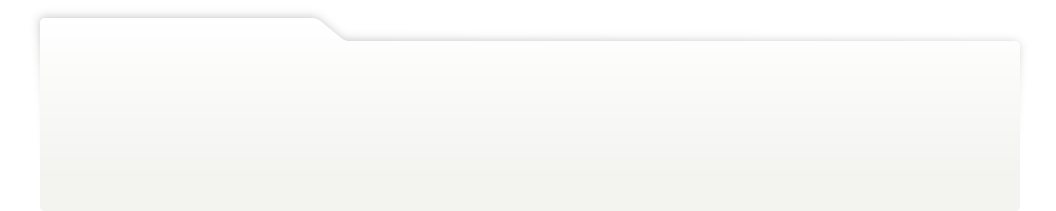
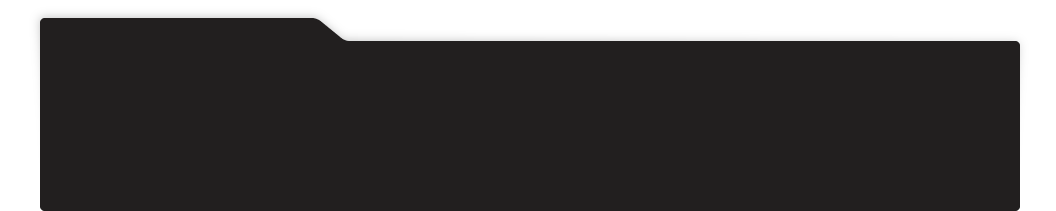
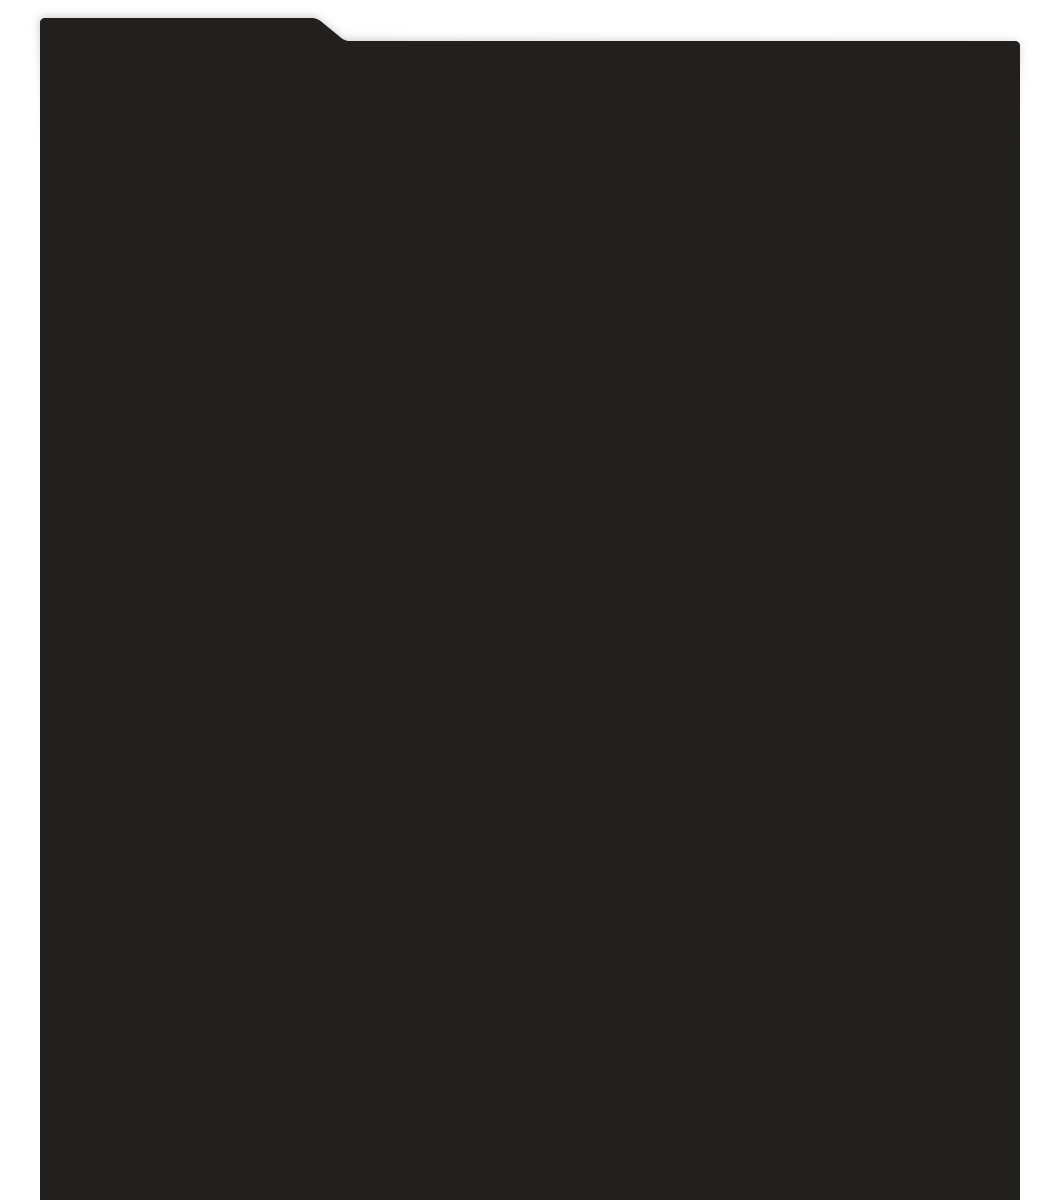
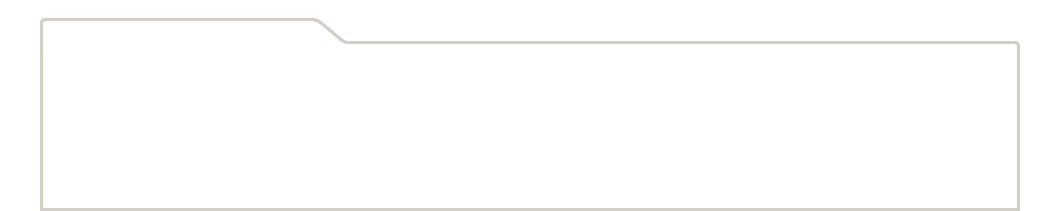
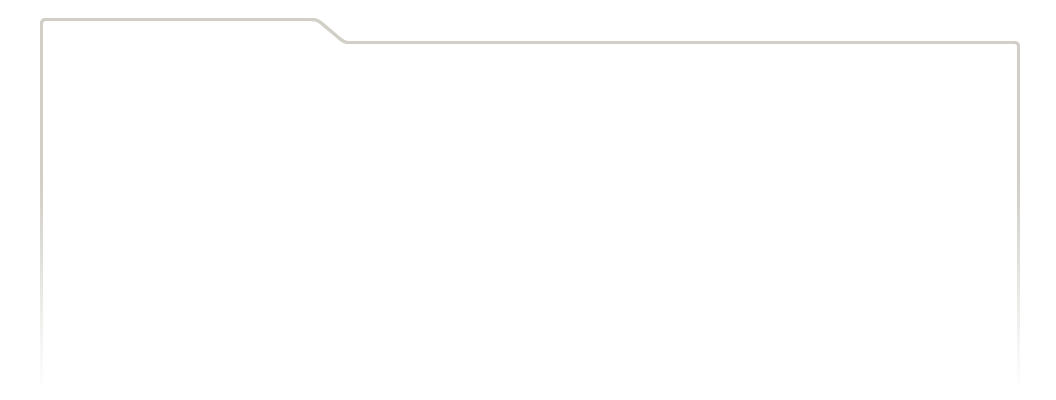
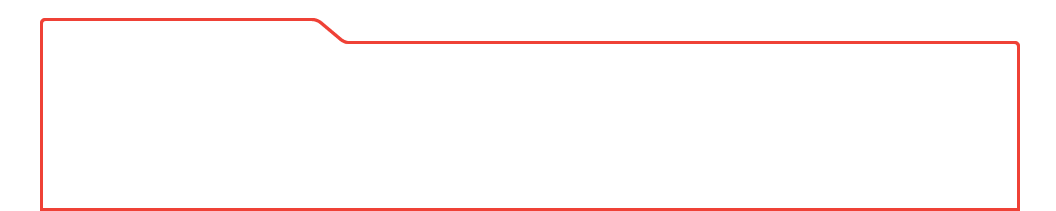
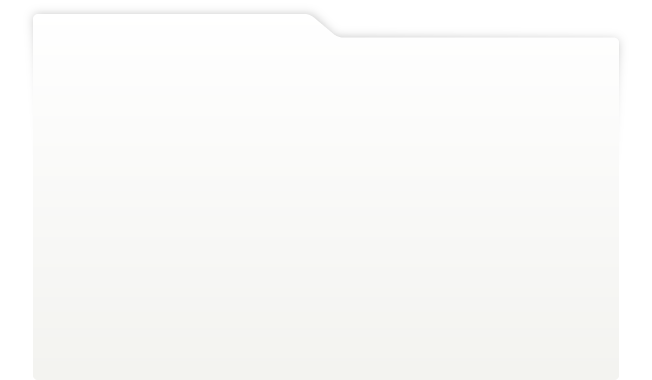
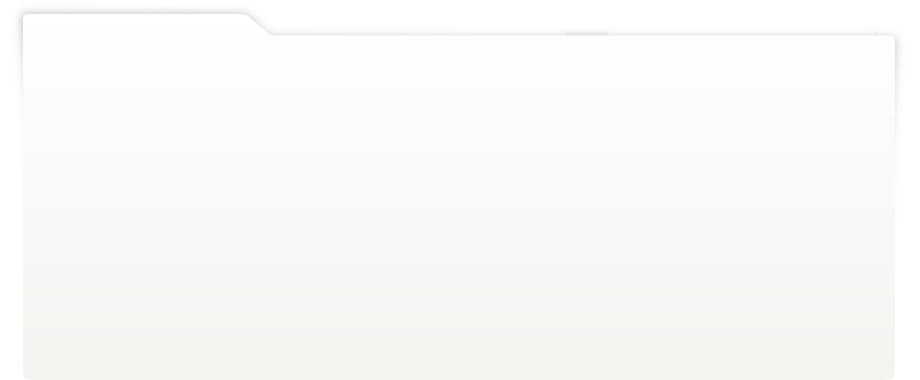
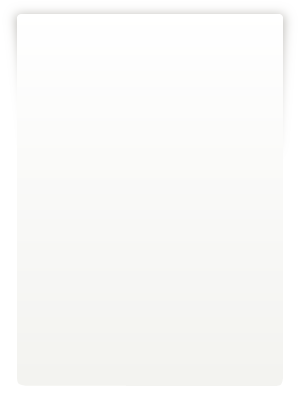
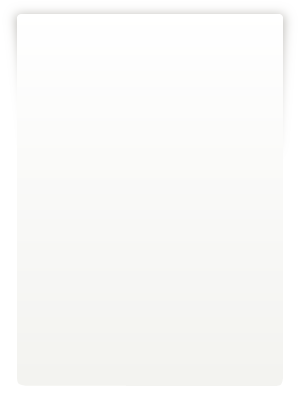
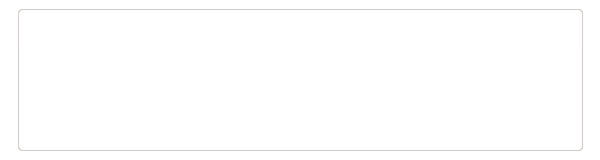
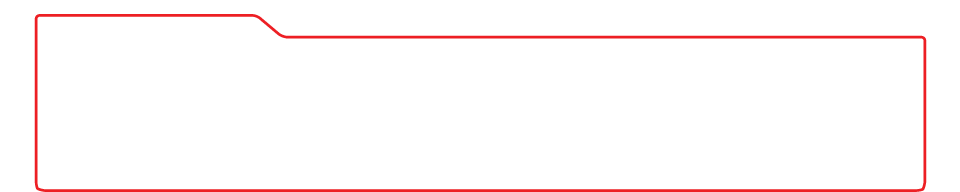
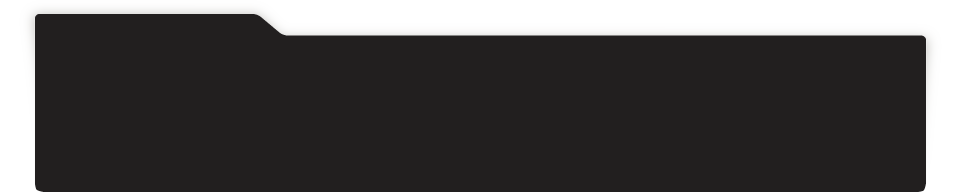
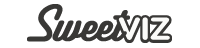
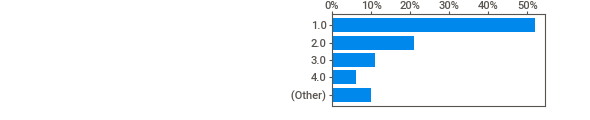
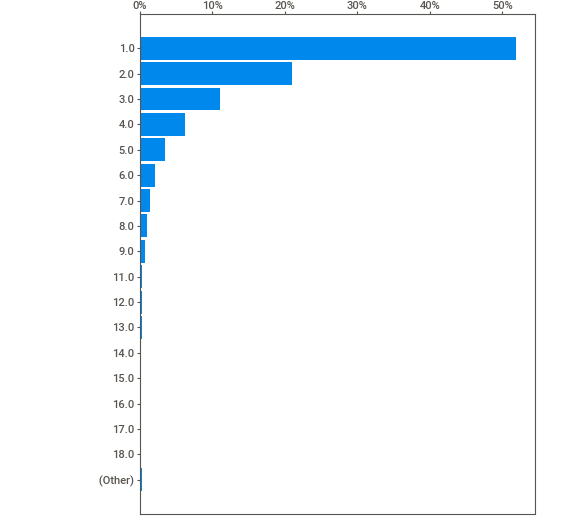
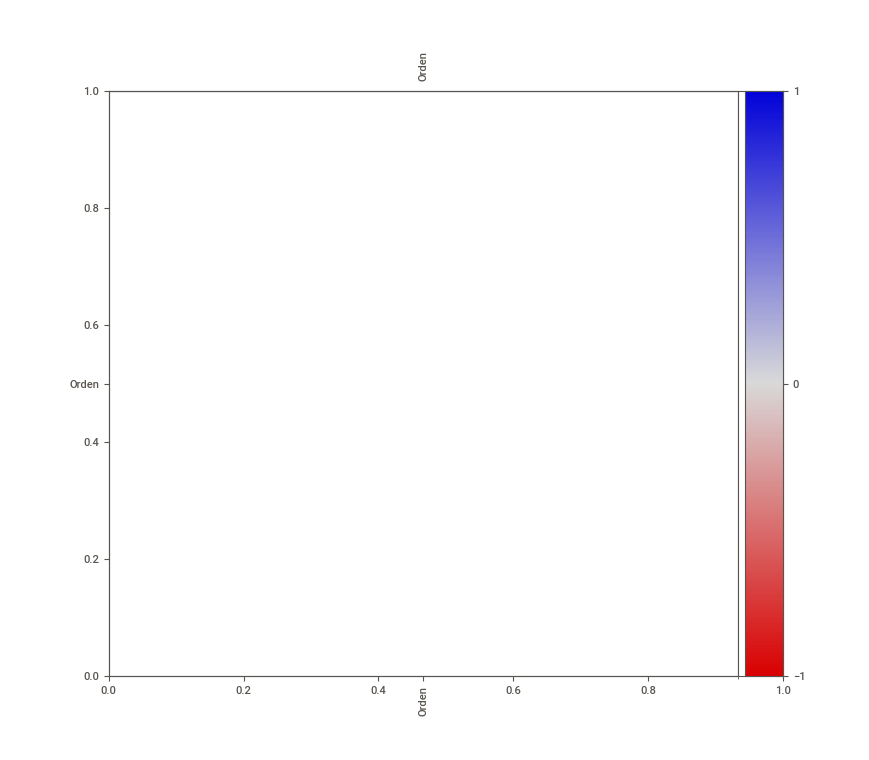
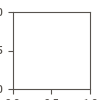

In [49]:
# EDA automático
my_report = sv.analyze(movimiento_df)
my_report.show_html(filepath='diputados/SWEETVIZ_REPORT_proyecto_movimiento_2025.html')
my_report.show_notebook(  w=None,
                h=None,
                scale=None,
                layout='widescreen',
                filepath=None,
                file_layout=None,
                file_scale=None)

**Observación**
* Valores faltantes: Fecha (109.914, 86%), Movimiento( 66.123, 52%) y Orden (76.673,60%) 

In [50]:
# Controlar repetidos ['Proyecto.ID', 'Fecha', 'Movimiento', 'Orden']
movimiento_df[movimiento_df.duplicated(['Proyecto.ID', 'Fecha', 'Movimiento', 'Orden'],keep=False)].sort_values('Proyecto.ID')

,ID,Proyecto.ID,Fecha,Movimiento,Orden
126879,126879,HCDN092479,2008-06-11T00:00:00,INSERCION DE LA DIPUTADA PETIT,2.0
126878,126878,HCDN092479,2008-06-11T00:00:00,INSERCION DE LA DIPUTADA PETIT,2.0
126673,126673,HCDN092645,2008-05-21T00:00:00,CONSIDERACION Y APROBACION,2.0
126674,126674,HCDN092645,2008-05-21T00:00:00,CONSIDERACION Y APROBACION,2.0
126626,126626,HCDN092686,NaN,REPRODUCIDO POR EXPEDIENTE 1220-D-10,1.0
...,...,...,...,...,...
232,232,HCDN275949,NaN,"""SOLICITUD DE SER COFIRMANTE DE LOS DIPUTADOS Y LAS DIPUTADAS: CASTAGNETO- HERRERA RICARDO Y AGUIRRE HILDA (A SUS ANTECEDENTES)""",1.0
185,185,HCDN276005,NaN,SOLICITUD DE SER ADHERENTE DEL DIPUTADO: ARANCIBIA (A SUS ANTECEDENTES),2.0
184,184,HCDN276005,NaN,SOLICITUD DE SER ADHERENTE DEL DIPUTADO: ARANCIBIA (A SUS ANTECEDENTES),2.0
41,41,HCDN276190,NaN,SOLICITUD DE SER COFIRMANTE DE LA DIPUTADA MONZON (A SUS ANTECEDENTES),2.0


In [51]:
# Eliminar duplicado
print("Antes de eliminar duplicados:", movimiento_df.shape)
movimiento_df.drop_duplicates(subset = ['Proyecto.ID', 'Fecha', 'Movimiento', 'Orden'],keep='last', inplace=True)
print("Después de eliminar duplicados:", movimiento_df.shape)

Antes de eliminar duplicados: (127156, 5)
Después de eliminar duplicados: (126335, 5)


In [52]:
# Guardar el archivo binario movimiento df
with open('movimiento_df_2025.pkl', 'wb') as file:
    pickle.dump(movimiento_df,file)

## 1.2.2 Preprocesamiento de los datos 


### Integramos información de giro a comision
* Cantidad de comisiones distintas que trataron la iniciativa
* Cantidad de giros a comisiones
* Proyecto girado a comisiones SALUD

#### Nombres de comisiones distintas teniendo en cuenta nombres de comisiones normalizadas

In [53]:
# Leemos objeto para mapeear con giro de comisiones
with open('BD_girocom_df_20250118.pkl', 'rb') as file:
    BD_girocom_df = pickle.load(file)

In [54]:
# BD giro comisión
BD_girocom_df.head(4)

,comision_nombre,archivo_fuente,comision_nombre_normalizada
0,SOBRE TABLAS,giro comision,SOBRE TABLAS
1,OBRAS PUBLICAS,giro comision,OBRAS PUBLICAS
2,PRESUPUESTO Y HACIENDA,giro comision,PRESUPUESTO Y HACIENDA
3,TURISMO,giro comision,TURISMO


In [55]:
# Tamaño
BD_girocom_df.shape

(196, 3)

In [56]:
# Leemos BD de comisiones normalizadas
with open('BD_normalizada_df_20250118.pkl', 'rb') as file:
    BD_normalizada_df = pickle.load(file)


In [57]:
# BD normalizada
BD_normalizada_df.head(4)

,comision_nombre_normalizada,archivo_fuente,comision_nombre_normalizada_Levenshtein
0,A LA PRESIDENCIA,giro comision,A LA PRESIDENCIA
1,A SUS ANTECEDENTES,giro comision,A SUS ANTECEDENTES
2,ACCION SOCIAL Y SALUD PUBLICA,"giro comision, dictamen, comision",ACCION SOCIAL Y SALUD PUBLICA
3,ACUERDOS,giro comision,ACUERDOS


In [58]:
# BD_girocom_df para integrar con proyecto
llave = 'comision_nombre_normalizada'
temp_df = pd.merge(BD_girocom_df, BD_normalizada_df, how ='inner', left_on = llave, right_on = llave)[['comision_nombre','comision_nombre_normalizada_Levenshtein']]
display(temp_df.head(4))
display(temp_df.shape)

,comision_nombre,comision_nombre_normalizada_Levenshtein
0,SOBRE TABLAS,SOBRE TABLAS
1,OBRAS PUBLICAS,OBRAS PUBLICAS
2,PRESUPUESTO Y HACIENDA,PRESUPUESTO Y HACIENDA
3,TURISMO,TURISMO


(196, 2)

In [59]:
# Eliminamos bases temporales
del BD_normalizada_df
del BD_girocom_df

In [60]:
# Para integrar archivos 
def set_merge(df1,df2, key1 = 'Proyecto.ID', key2 = 'Expediente.ID' , name = 'Cantidad'):
    # Buscar los proyectos con dictamenes
    proy_temp_df = pd.merge(df1[key1], df2, how ='inner', left_on = key1, right_on = key2)
    print("Base de datos: ",proy_temp_df.shape)
    proy_temp_df = proy_temp_df[key1].value_counts().reset_index()
    proy_temp_df.columns = [key1,name]
    all_df = pd.merge(df1, proy_temp_df, how ='left', left_on = key1, right_on = key1)
    print("Base de datos luego de merge: ",all_df.shape)
    return all_df

In [61]:
# Cantidad de proyectos únicos Proyecto.ID
girocom_df['Proyecto.ID'].describe()

count         404650
unique        267339
top       HCDN010321
freq              13
Name: Proyecto.ID, dtype: object

In [62]:
# Mapeo proyecto - comisiones
girocom_df[['Proyecto.ID','Comisión']].drop_duplicates().sort_values('Proyecto.ID')

,Proyecto.ID,Comisión
0,HCDN000000,SOBRE TABLAS
1,HCDN001090,OBRAS PUBLICAS
2,HCDN001090,PRESUPUESTO Y HACIENDA
3,HCDN001091,TURISMO
4,HCDN001092,ASUNTOS CONSTITUCIONALES
...,...,...
404647,HCDN280535,"FAMILIAS, NIÑEZ Y JUVENTUDES"
404649,HCDN280536,EDUCACION
404651,HCDN280537,LIBERTAD DE EXPRESION
404650,HCDN280537,ASUNTOS CONSTITUCIONALES


In [63]:
proyecto_df.shape

(103535, 8)

#### Giros a comisiones

In [64]:
# Cantidad de comisiones distintas
temp2_df = pd.merge(girocom_df[['Proyecto.ID','Comisión']].drop_duplicates(),temp_df, how ='inner', left_on = 'Comisión', right_on = 'comision_nombre')[['Proyecto.ID','comision_nombre_normalizada_Levenshtein']].drop_duplicates()
proyecto_df = set_merge(proyecto_df,temp2_df, key1 = 'Proyecto.ID', key2 = 'Proyecto.ID' , name = 'Cant_comisiones_dist')
proyecto_df.head(5)

Base de datos:  (159820, 2)
Base de datos luego de merge:  (103535, 9)


,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Cámara.Origen,Exp..Diputados,Tipo,Publicación.ID_faltantes,Cant_comisiones_dist
0,HCDN280534,"ANULENSE LOS DECRETOS 1107/2024 Y 1112/2024, SOBRE MODIFICACIONES EN LAS FUNCIONES DE LAS FUERZAS ARMADAS - FFAA -.",2024-12-23,HCDN142TP207,Diputados,7465-D-2024,LEY,0,3
1,HCDN280537,"PEDIDO DE INFORMES VERBALES AL CANCILLER ARGENTINO GERARDO WERTHEIN, ANTE LA COMISION DE LIBERTAD DE EXPRESION, SOBRE LA INTIMACION CURSADA A LA PERIODISTA NATASHA NIEBIESKIKWIAT A RAIZ DE SUS PUBLICACIONES EN TORNO A LA DETENCION DEL GENDARME NAHUEL GALLO, Y OTRAS CUESTIONES CONEXAS.",2024-12-23,HCDN142TP207,Diputados,7464-D-2024,DECLARACION,0,3
2,HCDN280533,DEFENSA DEL CONSUMIDOR - LEY 24240 -. MODIFICACION DEL ARTICULO 8 SOBRE IMAGENES HUMANAS EN PUBLICIDADES.,2024-12-23,HCDN142TP207,Diputados,7463-D-2024,LEY,0,1
3,HCDN280536,"EXPRESAR BENEPLACITO POR LA PARTICIPACION DE GAEL GOYANES Y DE AIXA DENISSE SANHUEZA IBARRA DEL INSTITUTO PRIVADO DE EDUCACION INTEGRAL (IPEI) DE RIO GALLEGOS, EN LA FINAL DE LA OLIMPIADA DE FILOSOFIA DE LA REPUBLICA ARGENTINA (OFRA), QUE SE LLEVO ADELANTE DEL 11 AL 13 DE DICIEMBRE EN LA PROVINCIA DE TUCUMAN.",2024-12-23,HCDN142TP207,Diputados,7462-D-2024,RESOLUCION,0,1
4,HCDN280535,SOLICITAR AL PODER EJECUTIVO DISPONGA DEJAR SIN EFECTO LA RESOLUCION GENERAL DE LA COMISION NACIONAL DE VALORES N° 1023/24 Y GARANTICE POLITICAS QUE PROTEJAN A LOS ADOLESCENTES DE LA EXPOSICION A RIESGOS FINANCIEROS ESPECULATIVOS.,2024-12-23,HCDN142TP207,Diputados,7461-D-2024,RESOLUCION,0,2


In [65]:
# Cantidad de giros a distintas
proyecto_df = set_merge(proyecto_df,girocom_df, key1 = 'Proyecto.ID', key2 = 'Proyecto.ID' , name = 'Cant_giros')
proyecto_df.head(5)

Base de datos:  (160370, 3)
Base de datos luego de merge:  (103535, 10)


,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Cámara.Origen,Exp..Diputados,Tipo,Publicación.ID_faltantes,Cant_comisiones_dist,Cant_giros
0,HCDN280534,"ANULENSE LOS DECRETOS 1107/2024 Y 1112/2024, SOBRE MODIFICACIONES EN LAS FUNCIONES DE LAS FUERZAS ARMADAS - FFAA -.",2024-12-23,HCDN142TP207,Diputados,7465-D-2024,LEY,0,3,3
1,HCDN280537,"PEDIDO DE INFORMES VERBALES AL CANCILLER ARGENTINO GERARDO WERTHEIN, ANTE LA COMISION DE LIBERTAD DE EXPRESION, SOBRE LA INTIMACION CURSADA A LA PERIODISTA NATASHA NIEBIESKIKWIAT A RAIZ DE SUS PUBLICACIONES EN TORNO A LA DETENCION DEL GENDARME NAHUEL GALLO, Y OTRAS CUESTIONES CONEXAS.",2024-12-23,HCDN142TP207,Diputados,7464-D-2024,DECLARACION,0,3,3
2,HCDN280533,DEFENSA DEL CONSUMIDOR - LEY 24240 -. MODIFICACION DEL ARTICULO 8 SOBRE IMAGENES HUMANAS EN PUBLICIDADES.,2024-12-23,HCDN142TP207,Diputados,7463-D-2024,LEY,0,1,1
3,HCDN280536,"EXPRESAR BENEPLACITO POR LA PARTICIPACION DE GAEL GOYANES Y DE AIXA DENISSE SANHUEZA IBARRA DEL INSTITUTO PRIVADO DE EDUCACION INTEGRAL (IPEI) DE RIO GALLEGOS, EN LA FINAL DE LA OLIMPIADA DE FILOSOFIA DE LA REPUBLICA ARGENTINA (OFRA), QUE SE LLEVO ADELANTE DEL 11 AL 13 DE DICIEMBRE EN LA PROVINCIA DE TUCUMAN.",2024-12-23,HCDN142TP207,Diputados,7462-D-2024,RESOLUCION,0,1,1
4,HCDN280535,SOLICITAR AL PODER EJECUTIVO DISPONGA DEJAR SIN EFECTO LA RESOLUCION GENERAL DE LA COMISION NACIONAL DE VALORES N° 1023/24 Y GARANTICE POLITICAS QUE PROTEJAN A LOS ADOLESCENTES DE LA EXPOSICION A RIESGOS FINANCIEROS ESPECULATIVOS.,2024-12-23,HCDN142TP207,Diputados,7461-D-2024,RESOLUCION,0,2,2


In [67]:
## Máximo número de orden
temp3_df = girocom_df.groupby('Proyecto.ID')['Orden'].max().reset_index()
temp3_df.columns = ['Proyecto.ID','Max_Orden']
proyecto_df = pd.merge(proyecto_df,temp3_df, how ='inner', left_on = 'Proyecto.ID', right_on = 'Proyecto.ID')
proyecto_df.head(3)

,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Cámara.Origen,Exp..Diputados,Tipo,Publicación.ID_faltantes,Cant_comisiones_dist,Cant_giros,Max_Orden
0,HCDN280534,"ANULENSE LOS DECRETOS 1107/2024 Y 1112/2024, SOBRE MODIFICACIONES EN LAS FUNCIONES DE LAS FUERZAS ARMADAS - FFAA -.",2024-12-23,HCDN142TP207,Diputados,7465-D-2024,LEY,0,3,3,3
1,HCDN280537,"PEDIDO DE INFORMES VERBALES AL CANCILLER ARGENTINO GERARDO WERTHEIN, ANTE LA COMISION DE LIBERTAD DE EXPRESION, SOBRE LA INTIMACION CURSADA A LA PERIODISTA NATASHA NIEBIESKIKWIAT A RAIZ DE SUS PUBLICACIONES EN TORNO A LA DETENCION DEL GENDARME NAHUEL GALLO, Y OTRAS CUESTIONES CONEXAS.",2024-12-23,HCDN142TP207,Diputados,7464-D-2024,DECLARACION,0,3,3,3
2,HCDN280533,DEFENSA DEL CONSUMIDOR - LEY 24240 -. MODIFICACION DEL ARTICULO 8 SOBRE IMAGENES HUMANAS EN PUBLICIDADES.,2024-12-23,HCDN142TP207,Diputados,7463-D-2024,LEY,0,1,1,1


In [71]:
# Eliminar objeto
#del temp_df

In [72]:
# 511 proyectos 
#proyecto_df[(proyecto_df['Cant_comisiones_dist'] !=	proyecto_df['Cant_giros']) | (proyecto_df['Cant_giros'] != proyecto_df['Max_Orden'])][['Proyecto.ID','Cant_comisiones_dist', 'Cant_giros', 'Max_Orden']]
proyecto_df[(proyecto_df['Cant_giros'] != proyecto_df['Max_Orden'])][['Proyecto.ID','Cant_comisiones_dist', 'Cant_giros', 'Max_Orden']]

,Proyecto.ID,Cant_comisiones_dist,Cant_giros,Max_Orden


Cant_giros y Max_Orden son iguales

#### Proyecto girado a comisiones SALUD

In [73]:
# Proyecto.ID 	comision_nombre_normalizada_Levenshtein único
# temp2_df
# lista de comisiones de SALUD
salud_com_list = list(temp2_df[temp2_df.comision_nombre_normalizada_Levenshtein.str.contains(pat = 'SALUD')]['comision_nombre_normalizada_Levenshtein'].unique())
salud_com_list

['ACCION SOCIAL Y SALUD PUBLICA',
 'ASISTENCIA SOCIAL Y SALUD PUBLICA',
 'SALUD Y DEPORTE',
 'SALUD']

In [74]:
# Dataframe de SALU
salud_com_df = temp2_df.loc[temp2_df['comision_nombre_normalizada_Levenshtein'].isin(salud_com_list),['Proyecto.ID','comision_nombre_normalizada_Levenshtein']]	
salud_com_df.head(5)

,Proyecto.ID,comision_nombre_normalizada_Levenshtein
38,HCDN001103,ACCION SOCIAL Y SALUD PUBLICA
58,HCDN001111,ACCION SOCIAL Y SALUD PUBLICA
61,HCDN001113,ACCION SOCIAL Y SALUD PUBLICA
63,HCDN001115,ACCION SOCIAL Y SALUD PUBLICA
66,HCDN001117,ACCION SOCIAL Y SALUD PUBLICA


In [75]:
# Por la limpieza de nombre de comision
print("Antes de eliminar duplicados:", salud_com_df.shape)
salud_com_df.drop_duplicates(keep='last', inplace=True)
print("Después de eliminar duplicados:", salud_com_df.shape)

Antes de eliminar duplicados: (26286, 2)
Después de eliminar duplicados: (26286, 2)


In [76]:
# Resumir Giros de comisiòn de SALUD
salud_com_df.describe()

,Proyecto.ID,comision_nombre_normalizada_Levenshtein
count,26286,26286
unique,25972,4
top,HCDN249440,ACCION SOCIAL Y SALUD PUBLICA
freq,2,17299


In [77]:
# Salud dataframe
with open('salud_com_df_2025.pkl', 'wb') as file:
    pickle.dump(salud_com_df, file)

In [ ]:
# Seguimiento de salud
girocom_df[girocom_df['Proyecto.ID']== 'HCDN249440'].sort_values(by =['Orden'], ascending=False)

In [78]:
# Identificar los proyectos que son girados a salud
temp4_df = pd.DataFrame({'Proyecto.ID': salud_com_df['Proyecto.ID'].unique()})
temp4_df['Proyecto_girado_a_comisiones_SALUD'] = 'GIRADO A COMISIONES DE SALUD' 
proyecto_df = pd.merge(proyecto_df, temp4_df, how ='left', left_on = 'Proyecto.ID', right_on = 'Proyecto.ID')

# Proyectos no encontrados en giro de comisiÓN
proyecto_df.loc[proyecto_df['Cant_giros'].isna(),('Proyecto_girado_a_comisiones_SALUD')] = 'SIN REGISTRO DE GIRO A COMISION'
# Imputar valores nulos
proyecto_df.fillna({'Proyecto_girado_a_comisiones_SALUD': 'GIRADO A OTRAS COMISIONES'}, inplace=True)
proyecto_df.head(5)

,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Cámara.Origen,Exp..Diputados,Tipo,Publicación.ID_faltantes,Cant_comisiones_dist,Cant_giros,Max_Orden,Proyecto_girado_a_comisiones_SALUD
0,HCDN280534,"ANULENSE LOS DECRETOS 1107/2024 Y 1112/2024, SOBRE MODIFICACIONES EN LAS FUNCIONES DE LAS FUERZAS ARMADAS - FFAA -.",2024-12-23,HCDN142TP207,Diputados,7465-D-2024,LEY,0,3,3,3,GIRADO A OTRAS COMISIONES
1,HCDN280537,"PEDIDO DE INFORMES VERBALES AL CANCILLER ARGENTINO GERARDO WERTHEIN, ANTE LA COMISION DE LIBERTAD DE EXPRESION, SOBRE LA INTIMACION CURSADA A LA PERIODISTA NATASHA NIEBIESKIKWIAT A RAIZ DE SUS PUBLICACIONES EN TORNO A LA DETENCION DEL GENDARME NAHUEL GALLO, Y OTRAS CUESTIONES CONEXAS.",2024-12-23,HCDN142TP207,Diputados,7464-D-2024,DECLARACION,0,3,3,3,GIRADO A OTRAS COMISIONES
2,HCDN280533,DEFENSA DEL CONSUMIDOR - LEY 24240 -. MODIFICACION DEL ARTICULO 8 SOBRE IMAGENES HUMANAS EN PUBLICIDADES.,2024-12-23,HCDN142TP207,Diputados,7463-D-2024,LEY,0,1,1,1,GIRADO A OTRAS COMISIONES
3,HCDN280536,"EXPRESAR BENEPLACITO POR LA PARTICIPACION DE GAEL GOYANES Y DE AIXA DENISSE SANHUEZA IBARRA DEL INSTITUTO PRIVADO DE EDUCACION INTEGRAL (IPEI) DE RIO GALLEGOS, EN LA FINAL DE LA OLIMPIADA DE FILOSOFIA DE LA REPUBLICA ARGENTINA (OFRA), QUE SE LLEVO ADELANTE DEL 11 AL 13 DE DICIEMBRE EN LA PROVINCIA DE TUCUMAN.",2024-12-23,HCDN142TP207,Diputados,7462-D-2024,RESOLUCION,0,1,1,1,GIRADO A OTRAS COMISIONES
4,HCDN280535,SOLICITAR AL PODER EJECUTIVO DISPONGA DEJAR SIN EFECTO LA RESOLUCION GENERAL DE LA COMISION NACIONAL DE VALORES N° 1023/24 Y GARANTICE POLITICAS QUE PROTEJAN A LOS ADOLESCENTES DE LA EXPOSICION A RIESGOS FINANCIEROS ESPECULATIVOS.,2024-12-23,HCDN142TP207,Diputados,7461-D-2024,RESOLUCION,0,2,2,2,GIRADO A OTRAS COMISIONES


In [79]:
proyecto_df.shape

(103535, 12)

In [81]:
#del temp2_df
#del temp3_df
#del temp4_df
#del temp_df

### Resultado - Estado de proyecto 

In [82]:
resultado_df.describe(include='all')

,Expediente.ID,Cabecera,Dictamen.Tipo,OD.Número,OD.Publicación,Fecha,Resultado,Cabecera_faltante,Dictamen.Tipo_faltante,OD.Número_faltante,OD.Publicación_faltante,Fecha_faltante,Resultado_faltante
count,107217,20440,20933,20256.000000,20331,15689,15689,107217.000000,107217.000000,107217.000000,107217.000000,107217.000000,107217.000000
unique,104925,1625,5,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,HCDN128142,cabecera,Orden del Dia,NaN,NaN,NaN,APROBADO,NaN,NaN,NaN,NaN,NaN,NaN
freq,46,18690,20257,NaN,NaN,NaN,13853,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1190.395932,2015-02-05 01:33:08.313413120,1935-03-24 03:58:27.298106880,NaN,0.809359,0.804760,0.811075,0.810375,0.853671,0.853671
min,NaN,NaN,NaN,1.000000,2008-03-25 00:00:00,1899-12-30 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,490.000000,2011-06-13 00:00:00,1899-12-30 00:00:00,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,NaN,NaN,NaN,1071.000000,2014-09-09 00:00:00,1899-12-30 00:00:00,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,NaN,NaN,NaN,1822.000000,2017-11-23 00:00:00,2008-12-03 00:00:00,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,NaN,NaN,NaN,3044.000000,2024-11-20 00:00:00,2024-11-27 00:00:00,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
# Para tomar el máx resultado
print('Tamaño de resultado:',resultado_df.shape)
max_resultado_df = resultado_df.sort_values(by=['Fecha'], ascending=False)
max_resultado_df = max_resultado_df.drop_duplicates(subset='Expediente.ID', keep='first')
print('Tamaño de max_resultado:',max_resultado_df.shape)
max_resultado_df.head()

Tamaño de resultado: (107217, 13)
Tamaño de max_resultado: (104925, 13)


,Expediente.ID,Cabecera,Dictamen.Tipo,OD.Número,OD.Publicación,Fecha,Resultado,Cabecera_faltante,Dictamen.Tipo_faltante,OD.Número_faltante,OD.Publicación_faltante,Fecha_faltante,Resultado_faltante
100182,HCDN275059,cabecera,Orden del Dia,661.0,2024-11-19,2024-11-27,MEDIA SANCION,0,0,0,0,0,0
83155,HCDN278574,cabecera,Orden del Dia,500.0,2024-10-14,2024-11-27,MEDIA SANCION,0,0,0,0,0,0
3220,HCDN259264,cabecera,Orden del Dia,89.0,2024-06-03,2024-10-01,SANCIONADO,0,0,0,0,0,0
83171,HCDN236992,cabecera,Orden del Dia,272.0,2024-08-12,2024-10-01,SANCIONADO,0,0,0,0,0,0
79222,HCDN195479,cabecera,Orden del Dia,269.0,2024-08-09,2024-10-01,SANCIONADO,0,0,0,0,0,0


In [84]:
resultado_df[resultado_df['Expediente.ID']=='HCDN275059']

,Expediente.ID,Cabecera,Dictamen.Tipo,OD.Número,OD.Publicación,Fecha,Resultado,Cabecera_faltante,Dictamen.Tipo_faltante,OD.Número_faltante,OD.Publicación_faltante,Fecha_faltante,Resultado_faltante
100182,HCDN275059,cabecera,Orden del Dia,661.0,2024-11-19,2024-11-27,MEDIA SANCION,0,0,0,0,0,0
103997,HCDN275059,HCDN275059,Orden del Dia,661.0,2024-11-19,NaT,NaN,0,0,0,0,1,1


In [85]:
print("Cantidad de expedientes Únicos considerando la fecha más reciente:",max_resultado_df['Expediente.ID'].nunique(), df.shape)

Cantidad de expedientes Únicos considerando la fecha más reciente: 104925 (126335, 5)


In [86]:
# En caso de valores nulos en resultado, el expediente no tuvo dictamen de comisión ni tratamiento posterior.
# Que representa resultado
# Ojo con "No tuvo tratamiento posterior ni dictamen, porque puede darse porque los datos recolectados son hasta 09/12/2023"
max_resultado_df.fillna({'Resultado': 'NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN'}, inplace=True)

In [87]:
max_resultado_df.Resultado.value_counts()

Resultado
NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN    89400
APROBADO                                     13802
MEDIA SANCION                                 1127
SANCIONADO                                     590
RECHAZADO                                        3
RETIRADO                                         3
Name: count, dtype: int64

In [88]:
# Integrar nuevas variables. ùltimo resultado
proyecto_df = pd.merge(proyecto_df, max_resultado_df, how ='left', left_on = 'Proyecto.ID', right_on = 'Expediente.ID')
proyecto_df.head()

,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Cámara.Origen,Exp..Diputados,Tipo,Publicación.ID_faltantes,Cant_comisiones_dist,Cant_giros,...,OD.Número,OD.Publicación,Fecha,Resultado,Cabecera_faltante,Dictamen.Tipo_faltante,OD.Número_faltante,OD.Publicación_faltante,Fecha_faltante,Resultado_faltante
0,HCDN280534,"ANULENSE LOS DECRETOS 1107/2024 Y 1112/2024, SOBRE MODIFICACIONES EN LAS FUNCIONES DE LAS FUERZAS ARMADAS - FFAA -.",2024-12-23,HCDN142TP207,Diputados,7465-D-2024,LEY,0,3,3,...,NaN,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0
1,HCDN280537,"PEDIDO DE INFORMES VERBALES AL CANCILLER ARGENTINO GERARDO WERTHEIN, ANTE LA COMISION DE LIBERTAD DE EXPRESION, SOBRE LA INTIMACION CURSADA A LA PERIODISTA NATASHA NIEBIESKIKWIAT A RAIZ DE SUS PUBLICACIONES EN TORNO A LA DETENCION DEL GENDARME NAHUEL GALLO, Y OTRAS CUESTIONES CONEXAS.",2024-12-23,HCDN142TP207,Diputados,7464-D-2024,DECLARACION,0,3,3,...,NaN,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0
2,HCDN280533,DEFENSA DEL CONSUMIDOR - LEY 24240 -. MODIFICACION DEL ARTICULO 8 SOBRE IMAGENES HUMANAS EN PUBLICIDADES.,2024-12-23,HCDN142TP207,Diputados,7463-D-2024,LEY,0,1,1,...,NaN,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0
3,HCDN280536,"EXPRESAR BENEPLACITO POR LA PARTICIPACION DE GAEL GOYANES Y DE AIXA DENISSE SANHUEZA IBARRA DEL INSTITUTO PRIVADO DE EDUCACION INTEGRAL (IPEI) DE RIO GALLEGOS, EN LA FINAL DE LA OLIMPIADA DE FILOSOFIA DE LA REPUBLICA ARGENTINA (OFRA), QUE SE LLEVO ADELANTE DEL 11 AL 13 DE DICIEMBRE EN LA PROVINCIA DE TUCUMAN.",2024-12-23,HCDN142TP207,Diputados,7462-D-2024,RESOLUCION,0,1,1,...,NaN,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0
4,HCDN280535,SOLICITAR AL PODER EJECUTIVO DISPONGA DEJAR SIN EFECTO LA RESOLUCION GENERAL DE LA COMISION NACIONAL DE VALORES N° 1023/24 Y GARANTICE POLITICAS QUE PROTEJAN A LOS ADOLESCENTES DE LA EXPOSICION A RIESGOS FINANCIEROS ESPECULATIVOS.,2024-12-23,HCDN142TP207,Diputados,7461-D-2024,RESOLUCION,0,2,2,...,NaN,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0


In [89]:
proyecto_df.shape

(103535, 25)

### Cantidad de movimientos

In [90]:
movimiento_df.head()

,ID,Proyecto.ID,Fecha,Movimiento,Orden
0,0,HCDN276230,NaN,NaN,NaN
1,1,HCDN276229,NaN,NaN,NaN
2,2,HCDN276228,NaN,NaN,NaN
3,3,HCDN276227,NaN,NaN,NaN
4,4,HCDN276226,NaN,NaN,NaN


In [91]:
movimiento_df[movimiento_df['Proyecto.ID']=='HCDN092256']

,ID,Proyecto.ID,Fecha,Movimiento,Orden
127145,127145,HCDN092256,2008-03-12T00:00:00,MOCION DE PREFERENCIA PARA LA PROXIMA SESION CON DICTAMEN (AFIRMATIVA),1.0
127146,127146,HCDN092256,2008-04-09T00:00:00,MOCION DE PREFERENCIA PARA LA PROXIMA SESION CON DICTAMEN (AFIRMATIVA),2.0
127147,127147,HCDN092256,2008-05-07T00:00:00,"""RESOLUCION DE PRESIDENCIA - AMPLIACION DE GIRO A LAS COMISIONES DE DERECHOS HUMANOS Y GARANTIAS- JUSTICIA. SE SUPRIME EL GIRO A LA COMISION DE LEGISLACION PENAL. """,3.0
127148,127148,HCDN092256,NaN,REPRODUCIDO POR EXPEDIENTE 0036-D-10,9.0


In [92]:
# Proyectos con tienen registro de movimiento
temp_list = list(movimiento_df[~movimiento_df['Movimiento'].isna()]['Proyecto.ID'].unique())
proyecto_df['Tiene_info_movimiento'] = False
proyecto_df.loc[proyecto_df['Proyecto.ID'].isin(temp_list),'Tiene_info_movimiento'] = True

In [93]:
proyecto_df['Tiene_info_movimiento'].value_counts()

Tiene_info_movimiento
False    68692
True     34843
Name: count, dtype: int64

In [94]:
proyecto_df.head(2)

,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Cámara.Origen,Exp..Diputados,Tipo,Publicación.ID_faltantes,Cant_comisiones_dist,Cant_giros,...,OD.Publicación,Fecha,Resultado,Cabecera_faltante,Dictamen.Tipo_faltante,OD.Número_faltante,OD.Publicación_faltante,Fecha_faltante,Resultado_faltante,Tiene_info_movimiento
0,HCDN280534,"ANULENSE LOS DECRETOS 1107/2024 Y 1112/2024, SOBRE MODIFICACIONES EN LAS FUNCIONES DE LAS FUERZAS ARMADAS - FFAA -.",2024-12-23,HCDN142TP207,Diputados,7465-D-2024,LEY,0,3,3,...,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0,False
1,HCDN280537,"PEDIDO DE INFORMES VERBALES AL CANCILLER ARGENTINO GERARDO WERTHEIN, ANTE LA COMISION DE LIBERTAD DE EXPRESION, SOBRE LA INTIMACION CURSADA A LA PERIODISTA NATASHA NIEBIESKIKWIAT A RAIZ DE SUS PUBLICACIONES EN TORNO A LA DETENCION DEL GENDARME NAHUEL GALLO, Y OTRAS CUESTIONES CONEXAS.",2024-12-23,HCDN142TP207,Diputados,7464-D-2024,DECLARACION,0,3,3,...,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0,False


In [95]:
# Columnas
proyecto_df.columns

Index(['Proyecto.ID', 'Título', 'Publicación.Fecha', 'Publicación.ID',
       'Cámara.Origen', 'Exp..Diputados', 'Tipo', 'Publicación.ID_faltantes',
       'Cant_comisiones_dist', 'Cant_giros', 'Max_Orden',
       'Proyecto_girado_a_comisiones_SALUD', 'Expediente.ID', 'Cabecera',
       'Dictamen.Tipo', 'OD.Número', 'OD.Publicación', 'Fecha', 'Resultado',
       'Cabecera_faltante', 'Dictamen.Tipo_faltante', 'OD.Número_faltante',
       'OD.Publicación_faltante', 'Fecha_faltante', 'Resultado_faltante',
       'Tiene_info_movimiento'],
      dtype='object')

In [96]:
# Columnas irrelevantes
del proyecto_df['Cámara.Origen']
#del proyecto_df['Exp..Senado']
del proyecto_df['Expediente.ID']

In [97]:
# Columnas
proyecto_df.columns

Index(['Proyecto.ID', 'Título', 'Publicación.Fecha', 'Publicación.ID',
       'Exp..Diputados', 'Tipo', 'Publicación.ID_faltantes',
       'Cant_comisiones_dist', 'Cant_giros', 'Max_Orden',
       'Proyecto_girado_a_comisiones_SALUD', 'Cabecera', 'Dictamen.Tipo',
       'OD.Número', 'OD.Publicación', 'Fecha', 'Resultado',
       'Cabecera_faltante', 'Dictamen.Tipo_faltante', 'OD.Número_faltante',
       'OD.Publicación_faltante', 'Fecha_faltante', 'Resultado_faltante',
       'Tiene_info_movimiento'],
      dtype='object')

In [98]:
# Guardamos el archivo binario proyecto
with open('proyecto_df_2025.pkl', 'wb') as file:
    pickle.dump(proyecto_df,file)

###  Filtración por ventana de tiempo 2010 a 2023

In [99]:
# Atributos de fechas
proyecto_df[['Proyecto.ID', 'Publicación.Fecha','OD.Publicación', 'Fecha', 'Resultado']].head()

,Proyecto.ID,Publicación.Fecha,OD.Publicación,Fecha,Resultado
0,HCDN280534,2024-12-23,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
1,HCDN280537,2024-12-23,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
2,HCDN280533,2024-12-23,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
3,HCDN280536,2024-12-23,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
4,HCDN280535,2024-12-23,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN


In [100]:
# Fecha max en base a las fechas asociadas a resultado de proyecto
proyecto_df['Fecha_max'] = np.where(proyecto_df['Fecha']>proyecto_df['OD.Publicación'], proyecto_df['Fecha'],proyecto_df['OD.Publicación'])

In [101]:
proyecto_df[['Proyecto.ID', 'Publicación.Fecha','OD.Publicación', 'Fecha','Fecha_max', 'Resultado']].head()

,Proyecto.ID,Publicación.Fecha,OD.Publicación,Fecha,Fecha_max,Resultado
0,HCDN280534,2024-12-23,NaT,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
1,HCDN280537,2024-12-23,NaT,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
2,HCDN280533,2024-12-23,NaT,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
3,HCDN280536,2024-12-23,NaT,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
4,HCDN280535,2024-12-23,NaT,NaT,NaT,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN


In [102]:
# Tiempo transcurrido entre fecha de inicio de proyecto y fecha de último estado
proyecto_df['Duración_meses'] = proyecto_df['Fecha_max'].dt.to_period('M').astype('int64') - proyecto_df['Publicación.Fecha'].dt.to_period('M').astype('int64')
# Python calcula las diferencias de fecha aunque haya NA, pero los valore son grandes. Los convertimos en nulos
proyecto_df.loc[proyecto_df['Fecha_max'].isna(),'Duración_meses'] = pd.NA

In [103]:
# Chequeando solo 16846 proyectos tienen duración
proyecto_df.loc[~proyecto_df['Fecha_max'].isna(),['Proyecto.ID', 'Publicación.Fecha','OD.Publicación', 'Fecha','Fecha_max','Duración_meses', 'Resultado']].shape

(16846, 7)

In [104]:
# Estadística
proyecto_df[['Proyecto.ID', 'Publicación.Fecha','OD.Publicación', 'Fecha','Fecha_max','Duración_meses', 'Resultado']].describe(include='all')

,Proyecto.ID,Publicación.Fecha,OD.Publicación,Fecha,Fecha_max,Duración_meses,Resultado
count,103535,103535,16846,14480,16846,16846.000000,103476
unique,103535,NaN,NaN,NaN,NaN,NaN,6
top,HCDN280534,NaN,NaN,NaN,NaN,NaN,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
freq,1,NaN,NaN,NaN,NaN,NaN,88996
mean,NaN,2016-02-16 14:09:31.285072640,2015-02-17 09:50:37.540068864,1929-01-03 21:50:49.060773632,2015-03-04 23:13:50.440460544,4.186988,NaN
min,NaN,2008-03-03 00:00:00,2008-03-25 00:00:00,1899-12-30 00:00:00,2008-04-07 00:00:00,-12.000000,NaN
25%,NaN,2012-03-20 00:00:00,2011-06-10 00:00:00,1899-12-30 00:00:00,2011-07-22 00:00:00,2.000000,NaN
50%,NaN,2015-10-16 00:00:00,2014-09-05 00:00:00,1899-12-30 00:00:00,2014-09-08 00:00:00,3.000000,NaN
75%,NaN,2020-03-16 12:00:00,2018-06-07 00:00:00,2008-06-11 00:00:00,2018-06-19 00:00:00,5.000000,NaN
max,NaN,2024-12-23 00:00:00,2024-11-20 00:00:00,2024-11-27 00:00:00,2024-11-27 00:00:00,60.000000,NaN


Se identifican errores 

In [105]:
proyecto_df.loc[proyecto_df['Duración_meses']<0,['Proyecto.ID', 'Publicación.Fecha','OD.Publicación', 'Fecha','Fecha_max','Duración_meses', 'Resultado']]

,Proyecto.ID,Publicación.Fecha,OD.Publicación,Fecha,Fecha_max,Duración_meses,Resultado
11079,HCDN262801,2022-09-08,2022-02-26,1899-12-30,2022-02-26,-7.0,APROBADO
11238,HCDN262551,2022-09-01,2022-02-23,1899-12-30,2022-02-23,-7.0,APROBADO
26700,HCDN237796,2020-02-28,2019-02-26,NaT,2019-02-26,-12.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
51128,HCDN182600,2016-02-16,2015-03-22,NaT,2015-03-22,-11.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
53957,HCDN175832,2015-05-29,2014-08-22,NaT,2014-08-22,-9.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN
58366,HCDN168453,2014-10-10,2014-09-26,1899-12-30,2014-09-26,-1.0,APROBADO
67401,HCDN153863,2013-07-11,2013-04-13,1899-12-30,2013-04-13,-3.0,APROBADO
84627,HCDN125033,2011-02-14,2010-02-14,NaT,2010-02-14,-12.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN


### Seleccionamos los proyectos iniciados entre 2010-2023

In [106]:
proyecto_2010_2023_df = proyecto_df.loc[(proyecto_df['Publicación.Fecha'].dt.year>=2010) & (proyecto_df['Publicación.Fecha'].dt.year<2024),]
proyecto_2010_2023_df.head(4)

,Proyecto.ID,Título,Publicación.Fecha,Publicación.ID,Exp..Diputados,Tipo,Publicación.ID_faltantes,Cant_comisiones_dist,Cant_giros,Max_Orden,...,Resultado,Cabecera_faltante,Dictamen.Tipo_faltante,OD.Número_faltante,OD.Publicación_faltante,Fecha_faltante,Resultado_faltante,Tiene_info_movimiento,Fecha_max,Duración_meses
5346,HCDN272363,DECLARESE EL 2024 COMO AÑO DEL 140 ANIVERSARIO DE LA PROMULGACION DE LA LEY 1420 DE EDUCACION COMUN.,2023-12-29,HCDN141TP209,5003-D-2023,LEY,0,2,2,2,...,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0,False,NaT,NaN
5347,HCDN272366,"EXPRESAR REPUDIO POR LAS AMENAZAS DE MUERTE AL PERIODISTA EDUARDO FEINMANN Y LAS AGRESIONES FISICAS Y VERBALES AL CRONISTA LUCAS JEREZ, Y OTRAS CUESTIONES CONEXAS.",2023-12-29,HCDN141TP209,5002-D-2023,DECLARACION,0,2,2,2,...,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0,True,NaT,NaN
5348,HCDN272365,"PEDIDO DE INFORMES AL PODER EJECUTIVO SOBRE DIVERSAS CUESTIONES RELACIONADAS CON EL PROGRAMA ""POTENCIAR TRABAJO"".",2023-12-29,HCDN141TP209,5001-D-2023,RESOLUCION,0,1,1,1,...,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0,False,NaT,NaN
5349,HCDN272364,"PEDIDO DE INFORMES AL PODER EJECUTIVO SOBRE DIVERSAS CUESTIONES RELACIONADAS CON EL DENOMINADO ""FONDO ESTABILIZADOR DEL TRIGO ARGENTINO"" CREADO POR EL DECRETO 132/22.",2023-12-29,HCDN141TP209,5000-D-2023,RESOLUCION,0,2,2,2,...,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1.0,1.0,1.0,1.0,1.0,1.0,False,NaT,NaN


In [107]:
# Guardamos el archivo binario proyecto filtrado
with open('proyecto_2010_2023_df_2025.pkl', 'wb') as file:
    pickle.dump(proyecto_2010_2023_df,file)